In [ ]:
`import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import socket, struct

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss

**Load The Dataset**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Dataset.csv")

In [ ]:
data.shape

(3577296, 87)

In [ ]:
data=data.iloc[:2000000,:]

In [ ]:
data.shape

(2000000, 87)

In [ ]:
data.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

**Handel the Missing value**

In [ ]:
data.isnull().sum()

,0
Flow.ID,0
Source.IP,0
Source.Port,0
Destination.IP,0
Destination.Port,0
...,...
Idle.Max,0
Idle.Min,0
Label,0
L7Protocol,0


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])  # Show columns with missing values


Series([], dtype: int64)


In [ ]:
data.shape

(2000000, 87)

In [ ]:
# Function that changes IP addresses into numbers

def ip2int(ip):
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

In [ ]:
# Converting IP addresses into numbers
data['Source.IP'] = data['Source.IP'].apply(ip2int)
data['Destination.IP'] = data['Destination.IP'].apply(ip2int)

In [ ]:
data.head(5)

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,2886926638,52422,180881159,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,180881159,3128,2886926638,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,840939815,80,180881369,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,840939815,80,180881369,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,3232253995,55961,180881159,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [ ]:
# Checking if any value in the dataframe is null
data.isnull().values.any()

False

In [ ]:
# Checking types of values
print(data.dtypes)

Flow.ID              object
Source.IP             int64
Source.Port           int64
Destination.IP        int64
Destination.Port      int64
                     ...   
Idle.Max            float64
Idle.Min            float64
Label                object
L7Protocol            int64
ProtocolName         object
Length: 87, dtype: object


In [ ]:
# Checking columns that have only one unique value
data.columns[data.nunique() <= 1]

Index(['Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'CWE.Flag.Count',
       'Fwd.Avg.Bytes.Bulk', 'Fwd.Avg.Packets.Bulk', 'Fwd.Avg.Bulk.Rate',
       'Bwd.Avg.Bytes.Bulk', 'Bwd.Avg.Packets.Bulk', 'Bwd.Avg.Bulk.Rate',
       'Label'],
      dtype='object')

In [ ]:
count=0
for row in data["ProtocolName"]:
  if row==" ":
    count+=1
print(count)


0


In [ ]:
# Checking occurance of each application
data['ProtocolName'].value_counts()

,count
ProtocolName,
GOOGLE,529876
HTTP,414741
HTTP_PROXY,318837
SSL,238272
HTTP_CONNECT,181507
...,...
SIMET,2
OPENVPN,2
99TAXI,1


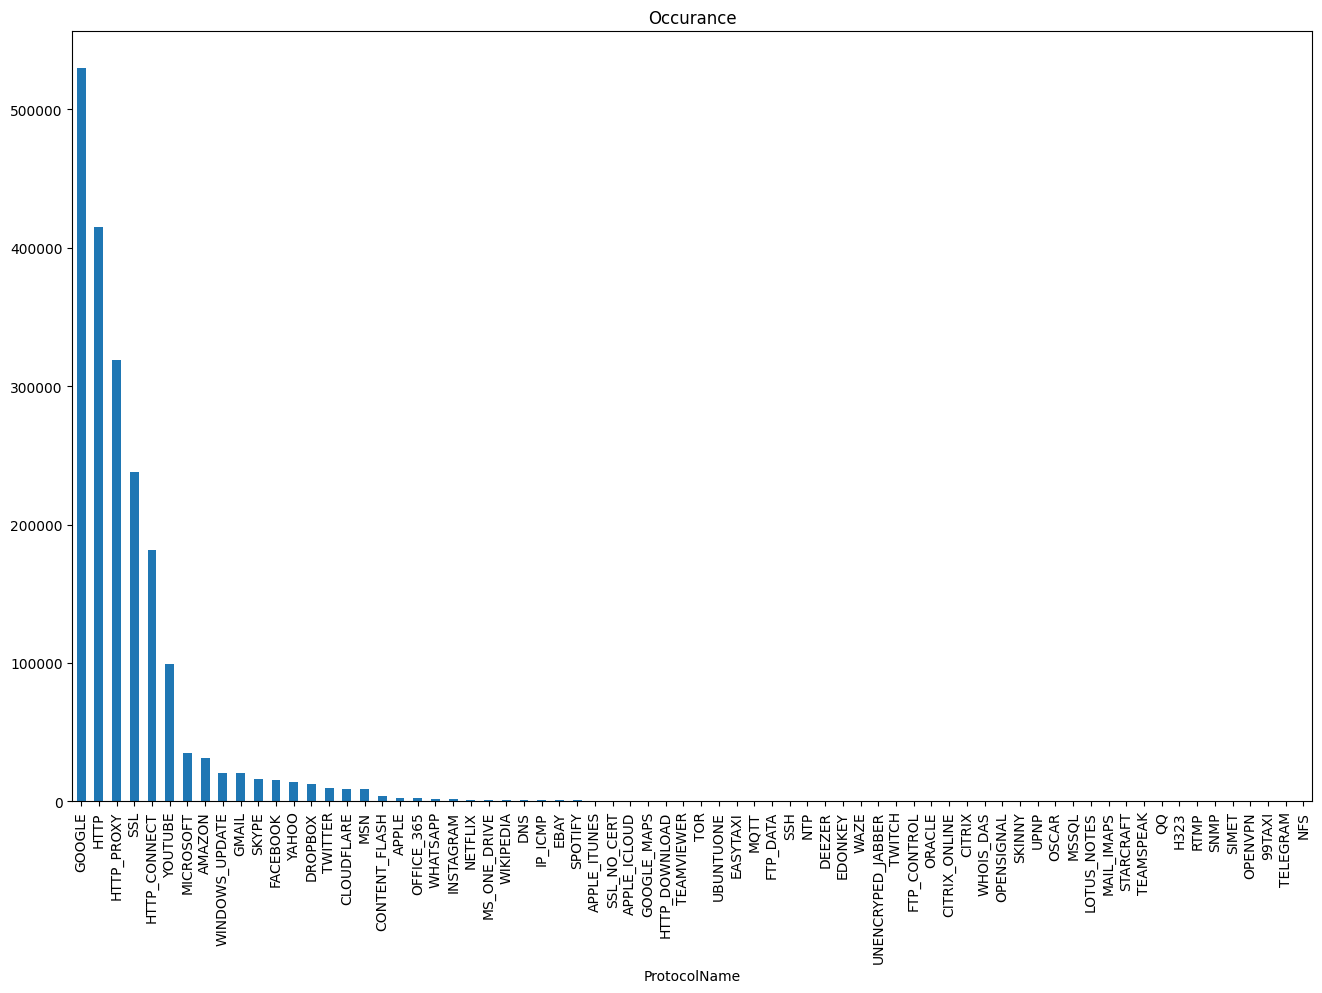

In [ ]:
# Plot the number of records for individual applications
target_count = data['ProtocolName'].value_counts()
plt.figure(figsize=(16,10))
target_count.plot(kind='bar', title='Occurance');

In [ ]:
# Step 1: Select all feature columns except 'ProtocolName'
feature_columns = data.columns.drop('ProtocolName')

# Step 2: Create the feature matrix X by selecting those columns and converting to float
X = data[feature_columns].apply(pd.to_numeric, errors='coerce')

# Step 3: Assign the target variable Y as the 'ProtocolName' column
Y = data['ProtocolName']


In [ ]:
# Convert application names to numbers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [ ]:
print(sorted(Counter(Y).items()))

[('99TAXI', 1), ('AMAZON', 31296), ('APPLE', 2766), ('APPLE_ICLOUD', 461), ('APPLE_ITUNES', 545), ('CITRIX', 11), ('CITRIX_ONLINE', 12), ('CLOUDFLARE', 8888), ('CONTENT_FLASH', 4277), ('DEEZER', 68), ('DNS', 904), ('DROPBOX', 12856), ('EASYTAXI', 179), ('EBAY', 820), ('EDONKEY', 68), ('FACEBOOK', 15292), ('FTP_CONTROL', 23), ('FTP_DATA', 127), ('GMAIL', 20282), ('GOOGLE', 529876), ('GOOGLE_MAPS', 403), ('H323', 2), ('HTTP', 414741), ('HTTP_CONNECT', 181507), ('HTTP_DOWNLOAD', 280), ('HTTP_PROXY', 318837), ('INSTAGRAM', 1589), ('IP_ICMP', 867), ('LOTUS_NOTES', 4), ('MAIL_IMAPS', 4), ('MICROSOFT', 35055), ('MQTT', 149), ('MSN', 8843), ('MSSQL', 4), ('MS_ONE_DRIVE', 1140), ('NETFLIX', 1183), ('NFS', 1), ('NTP', 79), ('OFFICE_365', 2724), ('OPENSIGNAL', 9), ('OPENVPN', 2), ('ORACLE', 12), ('OSCAR', 4), ('QQ', 2), ('RTMP', 2), ('SIMET', 2), ('SKINNY', 8), ('SKYPE', 16422), ('SNMP', 2), ('SPOTIFY', 794), ('SSH', 80), ('SSL', 238272), ('SSL_NO_CERT', 523), ('STARCRAFT', 3), ('TEAMSPEAK', 3), 

In [ ]:
print(sorted(Counter(encoded_Y).items()))

[(0, 1), (1, 31296), (2, 2766), (3, 461), (4, 545), (5, 11), (6, 12), (7, 8888), (8, 4277), (9, 68), (10, 904), (11, 12856), (12, 179), (13, 820), (14, 68), (15, 15292), (16, 23), (17, 127), (18, 20282), (19, 529876), (20, 403), (21, 2), (22, 414741), (23, 181507), (24, 280), (25, 318837), (26, 1589), (27, 867), (28, 4), (29, 4), (30, 35055), (31, 149), (32, 8843), (33, 4), (34, 1140), (35, 1183), (36, 1), (37, 79), (38, 2724), (39, 9), (40, 2), (41, 12), (42, 4), (43, 2), (44, 2), (45, 2), (46, 8), (47, 16422), (48, 2), (49, 794), (50, 80), (51, 238272), (52, 523), (53, 3), (54, 3), (55, 276), (56, 1), (57, 201), (58, 24), (59, 9676), (60, 180), (61, 31), (62, 4), (63, 52), (64, 1870), (65, 10), (66, 1114), (67, 20869), (68, 14283), (69, 99105)]


In [ ]:

dict_nearMiss = {
"GOOGLE":            8000,
"HTTP":              8000,
"HTTP_PROXY":        8000,
"SSL":               8000,
"HTTP_CONNECT":      8000,
"YOUTUBE":           8000,
"AMAZON":             8000,
"MICROSOFT":          8000,
"GMAIL":              8000,
"WINDOWS_UPDATE":     8000,
"SKYPE":              8000,
"FACEBOOK":           8000,
"DROPBOX":            8000,
"YAHOO":              8000,
"TWITTER":            8000,
"CLOUDFLARE":         8000,
"MSN":                8000,
}

In [ ]:
dict_smote = { "CONTENT_FLASH":       8000,
"APPLE":               8000,
"OFFICE_365":        8000,
"WHATSAPP":            8000,
"INSTAGRAM":          8000,
"WIKIPEDIA":           8000,
"MS_ONE_DRIVE":        8000,
"DNS":                 8000,
"IP_ICMP":             8000,
"NETFLIX":             8000,
"APPLE_ITUNES":        8000,
"SPOTIFY":             8000,
"APPLE_ICLOUD":        8000,
"EBAY":               8000,
"SSL_NO_CERT":          8000,
"GOOGLE_MAPS":          8000,
"EASYTAXI":             8000,
"TEAMVIEWER":           8000,
"HTTP_DOWNLOAD":        8000,
"MQTT":                 8000,
"TOR":                  8000,
"FTP_DATA":             8000,
"UBUNTUONE":            8000,
"NTP":                  8000,
"SSH": 8000}

In [ ]:
# Check for missing values
missing_values = X.isnull().sum()
print(missing_values[missing_values > 0])  # Show columns with missing values

Flow.ID      2000000
Timestamp    2000000
Label        2000000
dtype: int64


In [ ]:
# Assuming df is your DataFrame
X = X.drop(['Flow.ID', 'Timestamp','Label'], axis=1)

In [ ]:
# Check for missing values
missing_values = X.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [ ]:
from collections import Counter

# After applying SMOTE
print(Counter(Y))  # To see the number of samples in each class


Counter({'GOOGLE': 529876, 'HTTP': 414741, 'HTTP_PROXY': 318837, 'SSL': 238272, 'HTTP_CONNECT': 181507, 'YOUTUBE': 99105, 'MICROSOFT': 35055, 'AMAZON': 31296, 'WINDOWS_UPDATE': 20869, 'GMAIL': 20282, 'SKYPE': 16422, 'FACEBOOK': 15292, 'YAHOO': 14283, 'DROPBOX': 12856, 'TWITTER': 9676, 'CLOUDFLARE': 8888, 'MSN': 8843, 'CONTENT_FLASH': 4277, 'APPLE': 2766, 'OFFICE_365': 2724, 'WHATSAPP': 1870, 'INSTAGRAM': 1589, 'NETFLIX': 1183, 'MS_ONE_DRIVE': 1140, 'WIKIPEDIA': 1114, 'DNS': 904, 'IP_ICMP': 867, 'EBAY': 820, 'SPOTIFY': 794, 'APPLE_ITUNES': 545, 'SSL_NO_CERT': 523, 'APPLE_ICLOUD': 461, 'GOOGLE_MAPS': 403, 'HTTP_DOWNLOAD': 280, 'TEAMVIEWER': 276, 'TOR': 201, 'UBUNTUONE': 180, 'EASYTAXI': 179, 'MQTT': 149, 'FTP_DATA': 127, 'SSH': 80, 'NTP': 79, 'EDONKEY': 68, 'DEEZER': 68, 'WAZE': 52, 'UNENCRYPED_JABBER': 31, 'TWITCH': 24, 'FTP_CONTROL': 23, 'ORACLE': 12, 'CITRIX_ONLINE': 12, 'CITRIX': 11, 'WHOIS_DAS': 10, 'OPENSIGNAL': 9, 'SKINNY': 8, 'MSSQL': 4, 'MAIL_IMAPS': 4, 'UPNP': 4, 'OSCAR': 4, 'L

In [ ]:
# Apply SMOTE first
smote = SMOTE(sampling_strategy=dict_smote)
X_smote, Y_smote = smote.fit_resample(X, Y)


In [ ]:
# Adjusting NearMiss with a safe n_neighbors value
# Find the smallest class size
min_samples = min(Counter(Y_smote).values())

# Set n_neighbors to the smallest class size
n_neighbors = min(1, min_samples)  # Avoids being less than 1

near_miss = NearMiss(sampling_strategy=dict_nearMiss, n_neighbors=n_neighbors)
X_resampled, Y_resampled = near_miss.fit_resample(X_smote, Y_smote)


In [ ]:
print("Shape of original data " + str(data.shape))
print("Shape X " + str(X.shape))
print("Shape X_resampled" + str(X_resampled.shape))
print("Shape Y " + str(Y.shape))
print("Shape y_resampled" + str(Y_resampled.shape))

Shape of original data (2000000, 87)
Shape X (2000000, 83)
Shape X_resampled(336369, 83)
Shape Y (2000000,)
Shape y_resampled(336369,)


In [ ]:
# creating new dataset
new_dataframe = pd.DataFrame(data = X_resampled, columns = feature_columns)

In [ ]:
new_dataframe['ProtocolName'] = Y_resampled

In [ ]:
new_dataframe.describe()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol
count,0.0,3.363690e+05,336369.000000,3.363690e+05,336369.000000,336369.000000,0.0,3.363690e+05,336369.000000,336369.000000,...,3.363690e+05,3.363690e+05,3.363690e+05,3.363690e+05,3.363690e+05,3.363690e+05,3.363690e+05,3.363690e+05,0.0,336369.000000
mean,NaN,8.090491e+08,40290.501375,1.661193e+09,5999.392905,6.351685,NaN,1.841337e+07,107.342868,101.925091,...,6.180545e+05,1.499256e+05,7.920140e+05,5.093158e+05,5.308010e+06,5.875409e+05,5.835294e+06,4.839647e+06,NaN,131.657941
std,NaN,1.216230e+09,18798.383509,1.320381e+09,15285.414651,2.483660,NaN,3.344433e+07,822.153886,796.284804,...,4.647596e+06,1.496376e+06,5.361698e+06,4.417219e+06,1.480925e+07,3.160644e+06,1.585882e+07,1.423503e+07,NaN,57.897960
min,NaN,9.053086e+07,0.000000,1.354038e+08,0.000000,0.000000,NaN,1.000000e+00,1.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000
25%,NaN,1.808813e+08,36543.000000,1.808813e+08,80.000000,6.000000,NaN,1.537000e+03,2.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,92.000000
50%,NaN,1.808814e+08,47142.000000,1.572395e+09,443.000000,6.000000,NaN,4.364220e+05,6.000000,5.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,133.000000
75%,NaN,1.808814e+08,52818.000000,3.003188e+09,3128.000000,6.000000,NaN,1.989897e+07,14.000000,12.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,175.000000
max,NaN,3.627732e+09,65473.000000,3.650231e+09,65534.000000,17.000000,NaN,1.200000e+08,34591.000000,45360.000000,...,1.110068e+08,7.225154e+07,1.110068e+08,1.110068e+08,1.200000e+08,7.263401e+07,1.200000e+08,1.200000e+08,NaN,222.000000


In [ ]:
new_dataframe.shape

(336369, 87)

In [ ]:
# Assuming df is your DataFrame
new_dataframe= new_dataframe.drop(['Flow.ID', 'Timestamp','Label'], axis=1)

In [ ]:
new_dataframe.to_csv('Imbalanced.csv', index=False)